### Exercício prático 05 - Interpolação

### Implementar dois algoritmos de interpolação, sendo um deles pela forma de Newton

### Plus - Matriz de Vandermonde


In [22]:
import numpy as np

def sistemaVandermonde(x,y):
  """Função que resolve um sistema Vandermonde pra obter a função polinomial interpoladora.
  Parâmetros de Entrada:\n
  x = valores de x tabelados em f(x)\n
  y = valores de f(x)\n (x,y) formam os pontos pra gerar a função interpoladora.\n
  Retorno:\n
  Mostra a matriz de Vandermonde.\n
  Mostra o polinômio Interpolador.\n
  Retorna array com os coeficientes da função interpoladora, que é a resolução do sistema linear.\n"""

  #inicializa as variáveis pra guardar os resultados,todas vazias
  n = len(x)
  A = np.empty((n,n))
  b = np.empty((n))

  # popula a matriz de vandermonde
  for i in range(0,n):
    A[i,0] = 1
    for j in range(1,n):
      A[i,j] = A[i,j-1]*x[i] #valor da comula anterior * o x referente a linha
    b[i] = y[i]
  
  print("Matriz de Vandermonde:\n")
  print(A)

  x = np.linalg.solve(A,b)


  print("Polinômio interporlador obtido:")
  p = np.poly1d(np.flip(x))
  print(p)
  return x

In [23]:
# x e y tabelados
x  = [-1, 0, 2]
fx = [4, 1, -1]
#Resolução

print(sistemaVandermonde(x,fx))

Matriz de Vandermonde:

[[ 1. -1.  1.]
 [ 1.  0.  0.]
 [ 1.  2.  4.]]
Polinômio interporlador obtido:
        2
0.6667 x - 2.333 x + 1
[ 1.         -2.33333333  0.66666667]


#### 1 - Forma de Lagrange

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def interpLagrange(xp,x,y,grau=None):
  """Função que Calcula o valor y da função interpoladora.\n
    Parâmetros:\n
    xp = Ponto da Interpolação.\n
    x = vetor dos valores x tabelados.\n
    y = vetor dos valores y tabelados.\n
    Retorno:\n
    yp = valor y do ponto da interpolação.
    """
  n=grau if grau != None else len(x)-1
  
  n =len(x)-1
  
  for k in range(0,n+1):
    p = 1
    for j in range(0,n+1):
      if k != j:
        p = p*(xp - x[j])/(x[k] - x[j])

    yp = yp + p * y[k]

  return yp


def interpLagrangeGrafico(x,y,grau=None):
  """Função que encontra o polinômio Interpolador pela forma de Lagrange.\n
  Parâmetros:\n
  x = vetor com valores x pra formação do polinômio Interpolador\n
  y = vetor com os valores de y pra formação da cunção interpoladora\n
  Intervalo = intervalo que será gerada a função Interpoladora. Por padrão recebe o valor de -1 até 2

  A função gera o gráfico da função interpoladora e retorna os valores da função interpoladora nesse intervalo passado por parâmetro
  """
  Intervalo=np.arange(min(x),max(x)+0.0001,0.01)

  n=grau if grau != None else len(x)-1

  yt = []
  # Valor inicial de g(xp).
  
  for i in Intervalo:
    yp = 0
    # Interpolação de Lagrange
    for k in range(0,n+1):  
      p = 1
      for j in range(0,n+1):
        if k != j:
          p = p*(i - x[j])/(x[k] - x[j])
      
      yp = yp + p * y[k]  
    yt.append(yp)
    
  plt.title(f'Polinomio Interpolador pela Forma de Lagrange')
  plt.plot(Intervalo,yt,'b-')
  plt.plot(x,y,'ro')
  plt.grid()
  plt.show()

  return yt

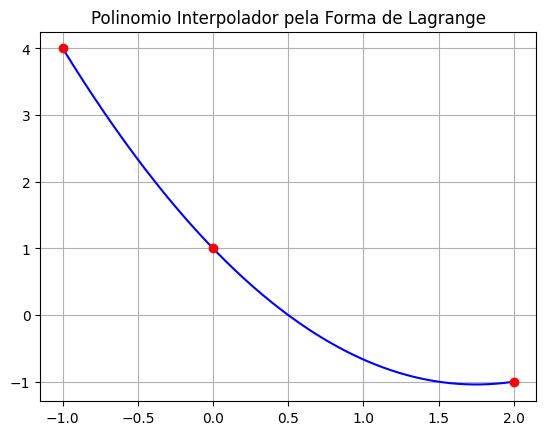

In [25]:
# Exemplo

# Dados do problema.
x = [-1, 0, 2]
y = [4, 1, -1]

# Interpolação de Lagrange.
p=interpLagrangeGrafico(x,y)

#### 2 - Forma de newton

In [26]:
def interpNewton(x, y, xi):
  """Função calcula a interpolação pela forma de newton.\n
  Parâmetros:\n
  x = ponto x tabelado.\n
  y = ponto y tabelado\n
  xi= Ponto da Interpolação.\n
  Retorno:\n
  yp = valor interpolado de xi."""

  #Número de dados
  n = len(x)
  #Inicialização da diferença dividida: n x n
  fdd = [[None for x in range(n)] for x in range(n)]
  #Valores da função f(X) em vários pontos
  yint = [None for x in range(n)]
    
  #Encontrando diferenças divididas.
  for i in range(n):
    fdd[i][0] = y[i]
  for j in range(1,n):
    for i in range(n-j):
      fdd[i][j] = (fdd[i+1][j-1] - fdd[i][j-1])/(x[i+j]-x[i])
    
    
  #Interpolação para xi.
  xterm = 1
  yint = fdd[0][0]
  for order in range(1, n):
    xterm = xterm * (xi - x[order-1])
    yint = yint + fdd[0][order]*xterm
    
  #Retornando g(xi).
  return yint

def interpNewtonGrafico(x,y,ShowGraph=True, MostrartabelaDD=False):
  """Função que Encontra o polinômio interpolador pela forma de newton.\n
  Parâmetros:\n
  x = vetor com valores x pra formação do polinômio Interpolador\n
  y = vetor com os valores de y pra formação da cunção interpoladora\n
  ShowGraph - Valor booleano pra gerar o gráfico da função interpoladora\n

  A função gera o gráfico da função interpoladora e retorna os valores da função interpoladora nesse intervalo passado por parâmetro.
  """
  Intervalo=np.arange(min(x),max(x)+0.0001,0.01)
  n = len(x)
  fdd = [[None for x in range(n)] for x in range(n)]

  for i in range(n):
    fdd[i][0] = y[i] 

  for j in range(1,n):
    for i in range(n-j):
      fdd[i][j] = (fdd[i+1][j-1] - fdd[i][j-1])/(x[i+j]-x[i])
  
  if MostrartabelaDD:
    print(" < Tabela de diferenças divididas >\n Colunas : Ordem\nLinhas: índice do x")
    fdd_table = pd.DataFrame(fdd)
    print(fdd_table)
  
  yt = []

  for xi in Intervalo:
    xterm = 1
    yint  = fdd[0][0]
    for order in range(1,n):
      xterm = xterm*(xi - x[order-1])
      yint  = yint + fdd[0][order]*xterm
    yt.append(yint)
    
  if ShowGraph:
    plt.title(f'Polinomio Interpolador pela Forma de Newton')
    plt.plot(Intervalo,yt,'b-')
    plt.plot(x,y,'ro')
    plt.grid()
    plt.show()

  return yt

In [27]:
def Results(f,pontosx,pontosy):
    """Função que plota os valores de f em pontos tabelados juntamente com a função interpoladora calculada pelo método de newton.\n"""
    x=np.arange(min(pontosx),max(pontosx)+0.0001,0.01)
    y= f(x)
    yt = []
    for i in x:
        yt.append(interpNewton(pontosx, pontosy, i))

    plt.plot(x,yt,marker = '', label= 'Função Interpoladora',color = 'green')
    plt.plot(pontosx,pontosy,'ro')
    plt.plot(x, y,'b--', label= 'Função f(x)')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Results()\nGráfico da função f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

 < Tabela de diferenças divididas >
 Colunas : Ordem
Linhas: índice do x
   0    1         2
0  4 -3.0  0.666667
1  1 -1.0       NaN
2 -1  NaN       NaN


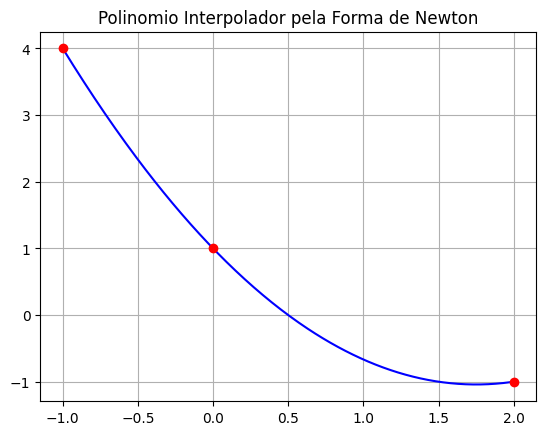

In [28]:
# exemplo
x  = [-1, 0, 2]
y  = [4, 1, -1]

f = lambda x: 1 - 7/3*x + 2/3*x**2
p = interpNewtonGrafico(x,y,True,True) 

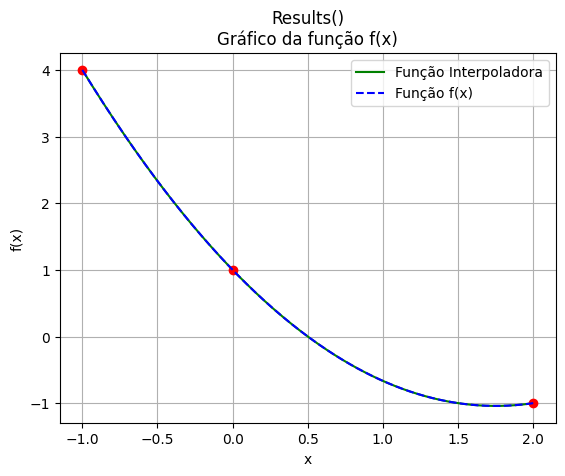

In [29]:
Results(f,x,y)

### Escolha 2 funções polinomiais de graus entre 10 e 20 e obtenha o polinômio interpolador dessas 2 funções para 5, 8 e 10 pontos na tabela


#### Função 1 - grau 15

In [30]:
polynomial_15 = lambda x: (x**15 - np.cos(x))/ (1 + 25 * x ** 2)

#### Função 2 - grau 18

In [31]:
polynomial_18 = lambda x: (x**18 + 2*x**15 + np.cos(x))/ (1 + 25 * x ** 2)

#### Para 5 Pontos na tabela

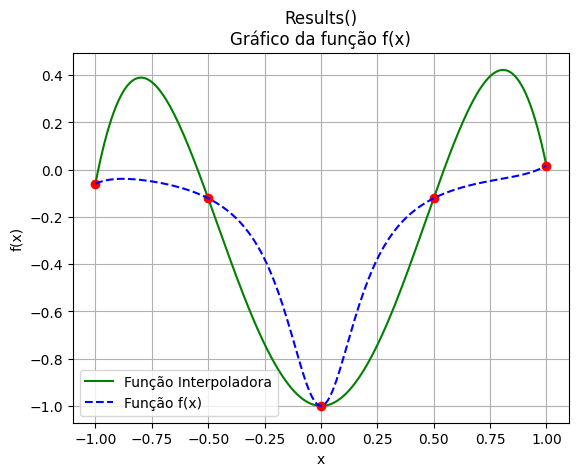

In [32]:
x = np.linspace(-1, 1, 5)
pontosy= list(map(polynomial_15, x))
Results(polynomial_15,x,pontosy)

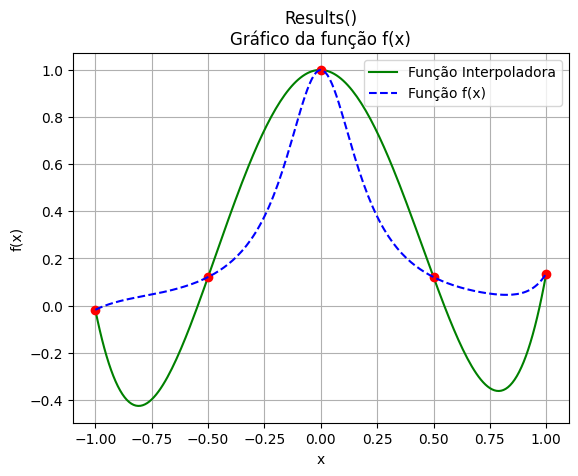

In [33]:
x = np.linspace(-1, 1, 5)
pontosy= list(map(polynomial_18, x))
Results(polynomial_18,x,pontosy)

#### Para 8 pontos 

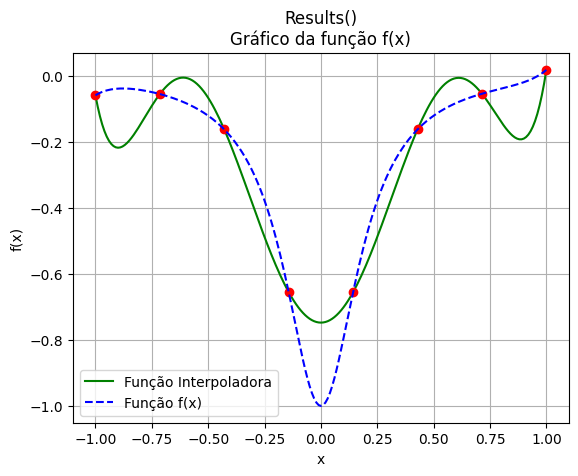

In [34]:
x = np.linspace(-1, 1, 8)
pontosy= list(map(polynomial_15, x))
Results(polynomial_15,x,pontosy)

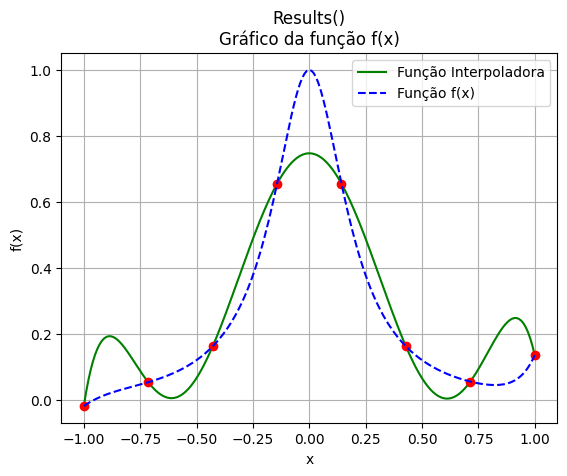

In [35]:
x = np.linspace(-1, 1, 8)
pontosy= list(map(polynomial_18, x))
Results(polynomial_18,x,pontosy)

#### Pra 10 pontos

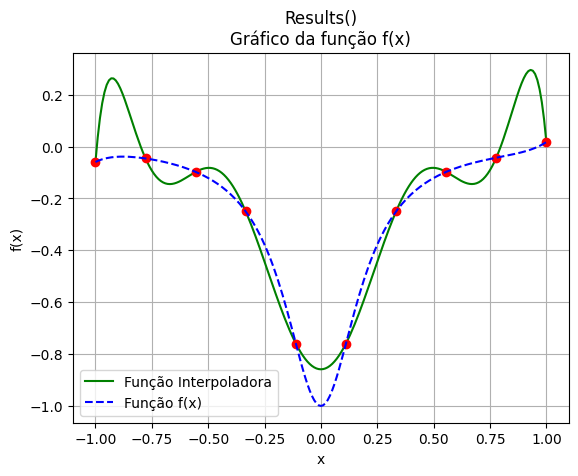

In [36]:
x = np.linspace(-1, 1, 10)
pontosy= list(map(polynomial_15, x))
Results(polynomial_15,x,pontosy)

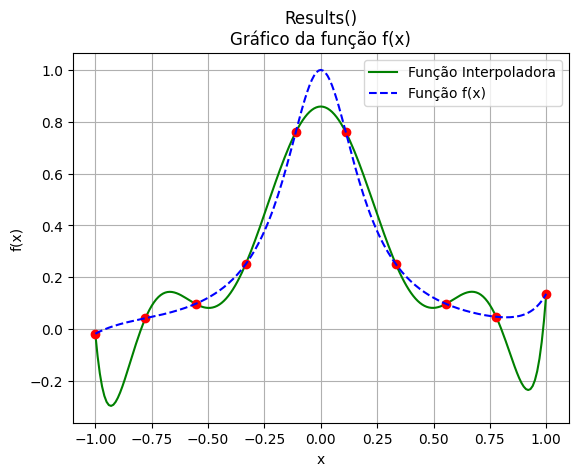

In [37]:
x = np.linspace(-1, 1, 10)
pontosy= list(map(polynomial_18, x))
Results(polynomial_18,x,pontosy)

### Para 10 pontos igualmente espaçados use a função Spline quadrática e compare com a interpolação de 10 pontos acima.

In [38]:
def splineLinear(xi,xiant,fxi,fxiant,x):
  si = (fxiant*(xi-x))/(xi-xiant) + (fxi*(x-xiant))/(xi-xiant)
  return si

def SLM(xi,xiant,fxi,fxiant,t):
  yt = []  
  for i in t:
    yt.append(splineLinear(xi,xiant,fxi,fxiant,i))
  return yt

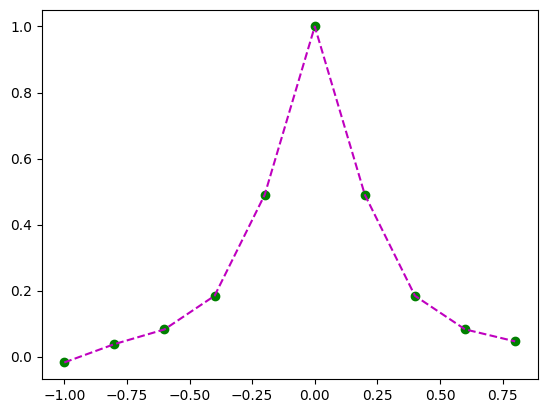

In [39]:
from scipy.interpolate import interp1d
x = np.arange(-1, 1.0, 0.2)
y= list(map(polynomial_18, x))
f2 = interp1d(x, y, kind='cubic')
plt.plot(x, y, 'go', x, f2(x),'m--')
plt.show()

In [40]:
def Results_spline(f,pontosx,pontosy,spline=True):
    """ Função que plota os valores de f em pontos tabelados juntamente com a função interpoladora calculada pelo método de newton com parâmetro spline.\n"""
    x=np.arange(min(pontosx),max(pontosx)+0.0001,0.01)
    y= f(x)
    t  = x
    yt = []
    yt2 =[]

    for i in t:
        yt.append(interpNewton(pontosx, pontosy, i))
    if spline:
        # f2 = interp1d(pontosx,pontosy,kind='linear',fill_value="extrapolate")
        # f3 = interp1d(pontosx,pontosy, kind='cubic',fill_value="extrapolate")
        f4 = interp1d(pontosx,pontosy,kind='quadratic',fill_value="extrapolate")


        # plt.plot(t,f2(t),'y-',label = 'spline linear')
        # plt.plot(t,f3(t),'m-',label = 'spline cúbica')
        plt.plot(t,f4(t),'r-',label = 'spline quadrática')

    plt.plot(t,yt,marker = '', label= 'Função Interpoladora',color = 'green')
    plt.plot(pontosx,pontosy,'ro')
    plt.plot(x, y,'b-.', label= 'Função f(x)')


    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Gráfico da função f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

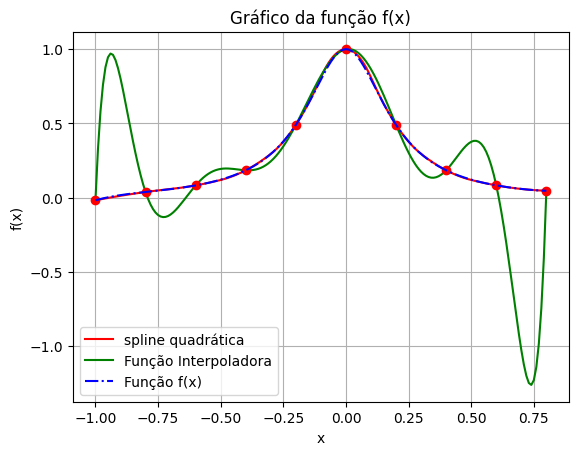

In [41]:
x = np.arange(-1, 0.9, 0.2)
pontosy= list(map(polynomial_18, x))
Results_spline(polynomial_18,x,pontosy)

#### Escolha 20 pontos aleatórios dentro do intervalo tabelado, mas diferente dos valores na tabela, e compare o valor da  interpolação com o valor da função original.

In [42]:
import random

def gerar_pontos_aleatorios(n):
    pontos = []
    for _ in range(n):
        ponto = random.uniform(-1, 1)
        pontos.append(ponto)
    return pontos

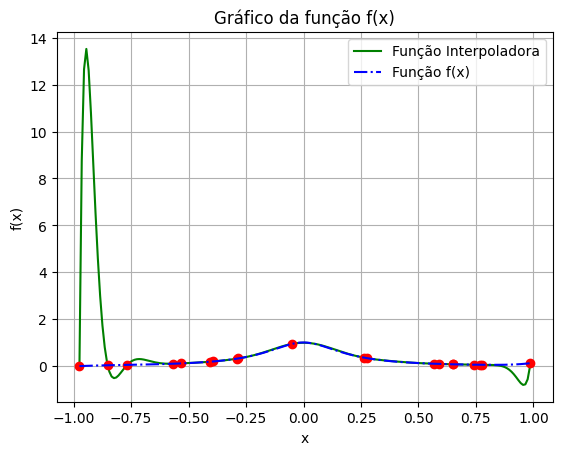

In [44]:
x = gerar_pontos_aleatorios(20)
pontosy = list(map(polynomial_18, x))
Intervalo = np.linspace(-1, 1, 20)
Results_spline(polynomial_18,x,pontosy,False)

[-1.  -0.5  0.   0.5  1. ] [0.038461538461538505, 0.13794629327179775, 1.0, 0.13794629327179775, 0.038461538461538505]


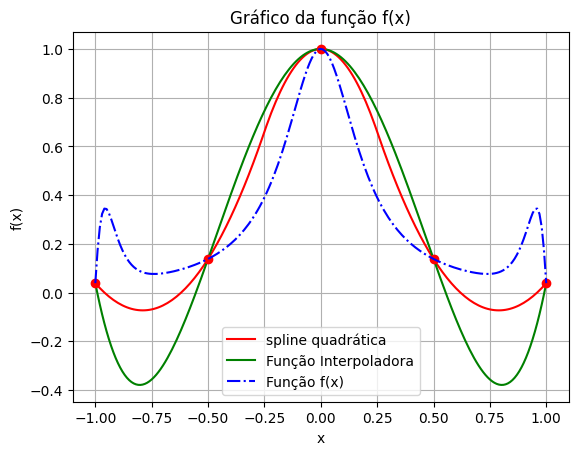

In [46]:
polynomial_15 = lambda x: np.sin(np.pi*x**15)/ np.pi*x + 1/(1+ 25*x**2)
x = np.linspace(-1, 1, 5)
pontosy= list(map(polynomial_15, x))
print(x,pontosy)
Results_spline(polynomial_15,x,pontosy)

 < Tabela de diferenças divididas >
 Colunas : Ordem
Linhas: índice do x
   0    1         2
0  4 -3.0  0.666667
1  1 -1.0       NaN
2 -1  NaN       NaN


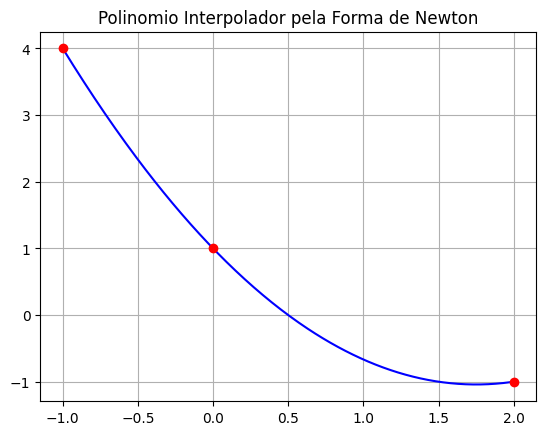

In [47]:
# exemplo
x  = [-1, 0, 2]
y  = [4, 1, -1]

f = lambda x: 1 - 7/3*x + 2/3*x**2
p = interpNewtonGrafico(x,y,MostrartabelaDD= True)